In [39]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.spatial.distance import pdist, squareform


In [40]:
# List of Nifty 50 symbols
nifty_2005_symbols = [
    "ACC.NS",
    "BHARTIARTL.NS",  # Added post-2000
    "BHEL.NS",        # Bharat Heavy Electricals
    "BPCL.NS",
    "CIPLA.NS",
    #"DRREDDY.NS",     # Dr. Reddy's Labs
    "GAIL.NS",        # Added post-2000
    "GRASIM.NS",
    "HCLTECH.NS",
    "HDFCBANK.NS",
    "HEROMOTOCO.NS",
    "HINDALCO.NS",
    "HINDUNILVR.NS",
    "HINDPETRO.NS",
    "ICICIBANK.NS",
    "INFY.NS",
    "ITC.NS",
    "IOC.NS",
    "LT.NS",
    "M&M.NS",
    "MARUTI.NS",      # Added in 2003
    "NTPC.NS",        # Added post-2000
    "ONGC.NS",        # Added post-2000
    "PNB.NS",         # Punjab National Bank
    "RELIANCE.NS",
#    "RANBAXY.NS",     # Acquired by Sun Pharma in 2014
    "SAIL.NS",
    #"SATYAMCOMP.NS",  # Collapsed in 2009 (now Tech Mahindra)
    "SBIN.NS",
    "SUNPHARMA.NS",   # Gained prominence
    "TATAMOTORS.NS",
    "TATAPOWER.NS",
    "TATASTEEL.NS",
    "TCS.NS",         # Added after 2004 IPO
    "WIPRO.NS",
    "ZEEL.NS"
]
# Define the date range
start_date = "2005-01-01"
end_date = "2007-1-01"

# Create an empty DataFrame to store returns
returns_df = pd.DataFrame()
vol_df = pd.DataFrame()

# Fetch data and calculate returns for each symbol
for symbol in nifty_2005_symbols:
    # Download historical data
    data = yf.download(symbol, start=start_date, end=end_date)
    
    # Calculate daily returns
    returns = data['Close'].pct_change()
    # remove possible nonsensical returns
    returns[returns<-1] = -1
    vol = data['Volume']
    # Add returns to the DataFrame
    returns_df[symbol] = returns
    vol_df[symbol] = vol

# Set the index name
returns_df.index.name = "Date"
vol_df.index.name = "Date"

# Display the first few rows of the DataFrame
print(returns_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

              ACC.NS  BHARTIARTL.NS   BHEL.NS   BPCL.NS  CIPLA.NS   GAIL.NS  \
Date                                                                          
2005-01-03       NaN            NaN       NaN       NaN       NaN       NaN   
2005-01-04  0.028550      -0.009637 -0.019960  0.004935 -0.003604 -0.002196   
2005-01-05 -0.007687      -0.069659 -0.026534 -0.026689 -0.053948 -0.065026   
2005-01-06 -0.014202       0.004041 -0.025277 -0.004936 -0.026932 -0.022255   
2005-01-07  0.020082      -0.004972 -0.000406  0.007937 -0.003076  0.027577   

            GRASIM.NS  HCLTECH.NS  HDFCBANK.NS  HEROMOTOCO.NS  ...  \
Date                                                           ...   
2005-01-03        NaN         NaN          NaN            NaN  ...   
2005-01-04   0.010437   -0.007147    -0.011042       0.018218  ...   
2005-01-05  -0.028675   -0.035819    -0.037347      -0.075163  ...   
2005-01-06  -0.004952   -0.038822    -0.029797       0.018286  ...   
2005-01-07  -0.000540    0

In [41]:
#the operation (ret + 1).cumprod() calculates the cumulative growth of each stock over time
# ret+1 -> For example, a 5% return becomes 1.05, a -2% return becomes 0.98
#.cumprod() ->Computes the cumulative product of these growth factors over time
# The result shows the evolution of a $1 investment in each stock over the period

# total pairs can be formed from n stocks = n*(n-1)/2

In [42]:
returns_df.columns

Index(['ACC.NS', 'BHARTIARTL.NS', 'BHEL.NS', 'BPCL.NS', 'CIPLA.NS', 'GAIL.NS',
       'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS',
       'HINDALCO.NS', 'HINDUNILVR.NS', 'HINDPETRO.NS', 'ICICIBANK.NS',
       'INFY.NS', 'ITC.NS', 'IOC.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
       'NTPC.NS', 'ONGC.NS', 'PNB.NS', 'RELIANCE.NS', 'SAIL.NS', 'SBIN.NS',
       'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS',
       'TCS.NS', 'WIPRO.NS', 'ZEEL.NS'],
      dtype='object')

In [43]:
from sklearn.metrics import pairwise_distances
import itertools

# write a function to select pairs
# function takes as input an array of formation returns and the desired number of pairs
# obs: form_ret column names are inherited original ret object
def get_pairs(form_ret, n_pairs):
    # replace first return with 0 so cum returns start at 1
    form_ret.iloc[0, :] = 0

    # create object with cumulative returns
    prc = (form_ret + 1.).cumprod()

    # define number of stocks and total number of pairs
    num_stocks = prc.shape[1]
    total_pairs = int(num_stocks * (num_stocks - 1) / 2)

    # create column with pair combinations to calculate distances
    pairs = np.asarray(list(itertools.combinations(sorted(prc.columns), 2)))
    pairs = pd.DataFrame(pairs, columns=["leg_1", "leg_2"])

    # keep only one set of combinations
    #pairs = pd.DataFrame(pairs[pairs[:, 1] > pairs[:, 0]], columns=["leg_1", "leg_2"])

    # calculate distances between normalized prices
    pairs_dist = pairwise_distances(prc.transpose(), prc.transpose())
    pairs_dist = pd.Series(pairs_dist[np.triu_indices(num_stocks, k=1)])
    pairs["dist"] = pairs_dist

    # remove pairs with 0 distance if any
    pairs = pairs[pairs.dist > 0]

    # order according to distance and select pairs
    pairs = pairs.sort_values("dist", ascending=True)
    pairs = pairs.loc[pairs.index[0:min(n_pairs, pairs.shape[0])]]

    # for these pairs, store the standard deviation of the spread
    pairs["spread_std"] = np.std(np.asarray(prc.loc[:, pairs.leg_1]) - np.asarray(prc.loc[:, pairs.leg_2]), axis=0,
                                 ddof=1)
    pairs.index = np.arange(pairs.shape[0])
    
    # returns selected pairs
    return pairs


In [44]:
# test the function for a specific date
n_pairs = 15

# formation period total return including dividends
form_ret = returns_df.loc["2005-01-01":"2005-12-31"].copy()

# daily volumes for formation period
form_vol = vol_df["2005-01-01":"2005-12-31"].copy()
form_vol[form_vol.isna()] = 0

# boolean to identify eligible stocks
#ava_stocks = (form_ret.isna().sum() == 0) & ((form_vol == 0).sum() == 0)

# create matrices with formation and trading prices only for selected stocks
#form_ret = ret.loc["1962-01-01":"1962-12-31",  ava_stocks]
#trade_ret = ret.loc["1963-01-01":"1963-06-30", ava_stocks]
trade_ret = returns_df.loc["2006-01-01":"2006-06-30"]

pairs = get_pairs(form_ret, n_pairs = 15)
pairs


,leg_1,leg_2,dist,spread_std
0,PNB.NS,TATASTEEL.NS,0.967016,0.061145
1,TATAMOTORS.NS,WIPRO.NS,0.983150,0.058012
2,BPCL.NS,ITC.NS,0.999326,0.321731
3,BPCL.NS,HINDUNILVR.NS,1.023245,0.276350
4,NTPC.NS,TATAPOWER.NS,1.056432,0.040994
5,CIPLA.NS,SUNPHARMA.NS,1.058092,0.066076
6,SAIL.NS,TATASTEEL.NS,1.077813,0.047603
7,BHEL.NS,LT.NS,1.111102,0.064911
8,ACC.NS,IOC.NS,1.122550,0.290440
9,INFY.NS,MARUTI.NS,1.141788,0.052933


In [45]:
# function to calculate returns on a set of pairs over a given trading period
def calculate_pairs_returns(trade_ret, pairs, d_open=2, wait1d=1):
    # trade_ret : array of returns over trading period
    # pairs  : data frame with information about pairs
    # d_open : number of standard deviations to open a pair
    # wait1d : number of days to wait before opening trade, default = 1

    # don't need dates as indices; switch to integers
    trade_ret_dates = trade_ret.index
    trade_ret.index = np.arange(trade_ret.shape[0])
    trade_ret.iloc[0, :] = 0

    # to treat delisting correctly, identify last non NA values
    last_valid_ret_ind = trade_ret.apply(pd.Series.last_valid_index)

    # can safely replace NAs with 0 before this index.
    for idx, column in enumerate(trade_ret.columns):
        r = trade_ret.loc[trade_ret.index[0]:last_valid_ret_ind.iloc[idx], column]
        r = r.fillna(0)
        trade_ret.loc[trade_ret.index[0]:last_valid_ret_ind.iloc[idx], column] = r

    # "normalize" trading period prices to start at 1
    trade_prc = (trade_ret + 1.).cumprod()

    # total number of days in trading period
    trading_days = trade_prc.shape[0]

    # total number of pairs considered
    num_pairs = pairs.shape[0]

    # storage for intermediate calculations
    directions = pd.DataFrame(np.zeros((trading_days, num_pairs)))
    payoffs = pd.DataFrame(np.zeros((trading_days, num_pairs)))

    # loop through pairs and check for trades
    for idx_pair, pair in pairs.iterrows():

        # create df to store weights (the w1 and w2 in GGR) and returns of legs
        pair_calcs = pd.DataFrame(np.zeros((trading_days, 9)),
                                  columns=["p_1", "p_2", "s", "direction", "w_1", "w_2", "r_1", "r_2", "payoff"])

        # identify pair legs, build prices, returns and spread vectors
        leg_1 = pair.leg_1
        leg_2 = pair.leg_2
        pair_calcs.p_1 = trade_prc.loc[:, leg_1]
        pair_calcs.p_2 = trade_prc.loc[:, leg_2]
        pair_calcs.r_1 = trade_ret.loc[:, leg_1]
        pair_calcs.r_2 = trade_ret.loc[:, leg_2]
        last_day = max(pair_calcs.p_1.last_valid_index(), pair_calcs.p_2.last_valid_index())
        pair_calcs.r_1 = pair_calcs.r_1.fillna(0)
        pair_calcs.r_2 = pair_calcs.r_2.fillna(0)

        pair_calcs.s = (pair_calcs.p_1 - pair_calcs.p_2) / pair.spread_std

        open_ids = np.array(trade_ret.index * (np.abs(pair_calcs.s) > d_open))
        open_ids = open_ids[open_ids != 0]
        open_ids = open_ids[open_ids <= last_day]

        close_ids = np.array(trade_ret.index[np.sign(pair_calcs.s).diff() != 0])
        close_ids = close_ids[~np.isnan(close_ids)]
        close_ids = np.append(close_ids, last_day)

        # date when first trade opens
        if len(open_ids) != 0:
            t_open = open_ids[0]
        else:
            t_open = np.nan

        # if there has been a divergence in the trading period
        if ~np.isnan(t_open):
            while ~np.isnan(t_open) & (t_open < last_day - wait1d):
                # check when trade closed
                t_close = np.min(close_ids[close_ids > t_open + wait1d])

                # store direction of trade over period when trade is open
                pair_calcs.loc[(t_open + wait1d + 1): (t_close + 1), "direction"] = -np.sign(
                    pair_calcs.loc[t_open - wait1d, "s"])

                # update w1 and w2                
                pair_calcs.w_1[(t_open + wait1d):(t_close + 1)] = np.append(1., (
                        1 + pair_calcs.r_1[(t_open + wait1d): (t_close)]).cumprod())
                pair_calcs.w_2[(t_open + wait1d):(t_close + 1)] = np.append(1., (
                        1 + pair_calcs.r_2[(t_open + wait1d): (t_close)]).cumprod())

                # update t_open => moves to next trade for this pair
                if any(open_ids > t_close):
                    t_open = open_ids[open_ids > t_close][0]
                else:
                    t_open = np.nan

        # calculate and store the payoffs for this pair
        pair_calcs["payoffs"] = pair_calcs.direction * (
                pair_calcs.w_1 * pair_calcs.r_1 - pair_calcs.w_2 * pair_calcs.r_2)
        payoffs.loc[:, idx_pair] = pair_calcs["payoffs"]
        directions.loc[:, idx_pair] = pair_calcs["direction"]

    directions.index = trade_ret_dates
    payoffs.index = trade_ret_dates

    # returns for committed capital approach - just the column average of payoffs
    returns_cc = payoffs.mean(axis=1)

    # for fully-invested approach, capital is divided among open pairs

    num_open_pairs = (directions != 0).sum(axis=1)
    num_open_pairs[num_open_pairs > 0] = 1. / num_open_pairs
    weights_fi = pd.concat([num_open_pairs] * num_pairs, axis=1)
    returns_fi = (weights_fi * payoffs).sum(axis=1)

    # return everything as a dictionary
    return {"pairs": pairs, "directions": directions, "payoffs": payoffs, "returns_cc": returns_cc,
            "returns_fi": returns_fi}


In [46]:
# use first pair in this example
i_pair = 0

rets_pair_form = form_ret.loc[:, [pairs.leg_1[i_pair],pairs.leg_2[i_pair]] ]


In [47]:
rets_pair_form.iloc[0,:] = 0
rets_pair_form.head()

,PNB.NS,TATASTEEL.NS
Date,,
2005-01-03,0.000000,0.000000
2005-01-04,0.037823,-0.000775
2005-01-05,-0.026558,-0.046388
2005-01-06,-0.021495,-0.036315
2005-01-07,-0.027882,0.016170


In [48]:
# normalized prices and std spread in formation period
norm_prices_form = (1+rets_pair_form).cumprod()
norm_prices_form["std_spread"] = (norm_prices_form[pairs.leg_1[i_pair]] - norm_prices_form[pairs.leg_2[i_pair]] )/pairs.spread_std[i_pair]


In [49]:
norm_prices_form.head()

,PNB.NS,TATASTEEL.NS,std_spread
Date,,,
2005-01-03,1.000000,1.000000,0.000000
2005-01-04,1.037823,0.999225,0.631249
2005-01-05,1.010261,0.952873,0.938556
2005-01-06,0.988545,0.918270,1.149320
2005-01-07,0.960983,0.933119,0.455712


In [50]:
# normalized prices and std spread in trading period
rets_pair_trade = trade_ret.loc[:, [pairs.leg_1[i_pair],pairs.leg_2[i_pair]] ]
rets_pair_trade.iloc[0,:] = 0
norm_prices_trade = (1+rets_pair_trade).cumprod()
norm_prices_trade["std_spread"] = (norm_prices_trade[pairs.leg_1[i_pair]] - norm_prices_trade[pairs.leg_2[i_pair]] )/pairs.spread_std[i_pair]

norm_prices_trade.head()

,PNB.NS,TATASTEEL.NS,std_spread
Date,,,
2006-01-02,1.000000,1.000000,0.000000
2006-01-03,1.002966,1.018997,-0.262183
2006-01-04,1.026271,1.013852,0.203103
2006-01-05,1.047140,1.003694,0.710535
2006-01-06,1.036547,1.013721,0.373310


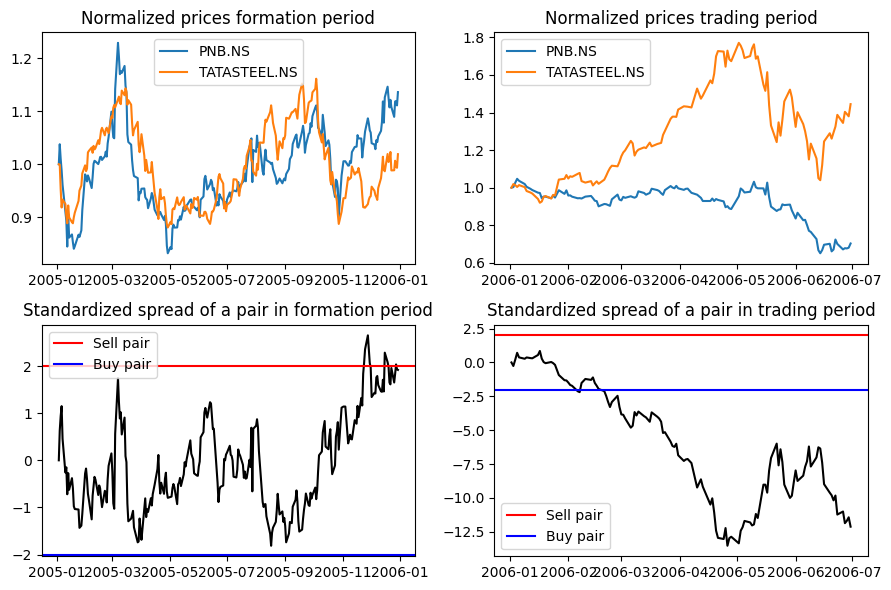

In [51]:
import matplotlib.pyplot as plt

# ploting: left = formation period, right = trading period

# plot normalized prices and std spread in trading period
fig = plt.figure();
fig.set_size_inches(9, 6);
ax1 = fig.add_subplot(2,2,1);
ax1.plot(norm_prices_form[[pairs.leg_1[i_pair], pairs.leg_2[i_pair]]], label = [pairs.leg_1[i_pair], pairs.leg_2[i_pair]]);
ax1.legend();
ax1.set_title("Normalized prices formation period");

ax2 = fig.add_subplot(2,2,3);
ax2.plot(norm_prices_form["std_spread"], color = "black");
plt.axhline(y=2, color='r', linestyle='-', label = "Sell pair");
plt.axhline(y=-2, color='b', linestyle='-', label = "Buy pair");
ax2.legend();
ax2.set_title("Standardized spread of a pair in formation period");
fig.tight_layout();

ax3 = fig.add_subplot(2,2,2);
ax3.plot(norm_prices_trade[[pairs.leg_1[i_pair], pairs.leg_2[i_pair]]], label = [pairs.leg_1[i_pair], pairs.leg_2[i_pair]]);
ax3.legend();
ax3.set_title("Normalized prices trading period");

ax3 = fig.add_subplot(2,2,4);
ax3.plot(norm_prices_trade["std_spread"], color = "black");
plt.axhline(y=2, color='r', linestyle='-', label = "Sell pair");
plt.axhline(y=-2, color='b', linestyle='-', label = "Buy pair");
ax3.legend();
ax3.set_title("Standardized spread of a pair in trading period");
fig.tight_layout();

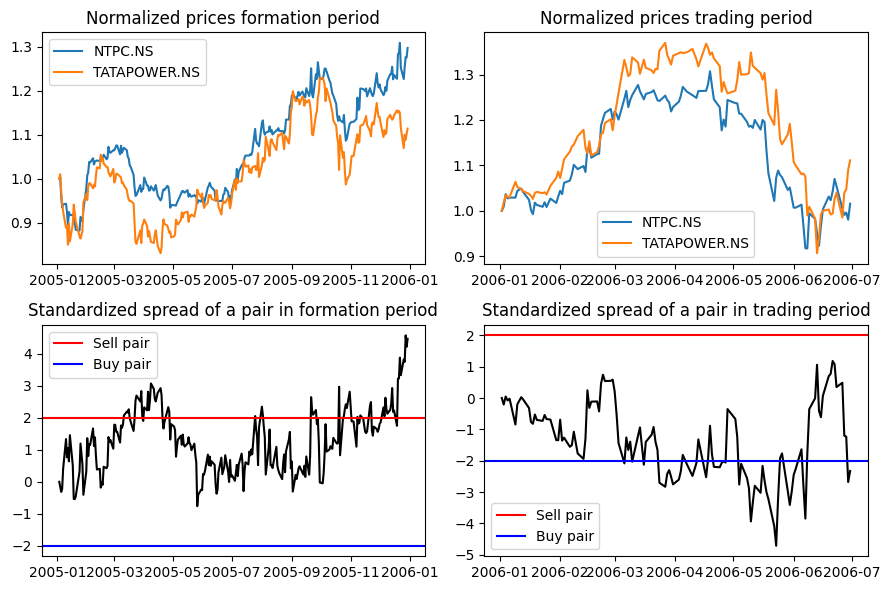

In [52]:
# inspecting another pair
i_pair = 4

rets_pair_form = form_ret.loc[:, [pairs.leg_1[i_pair],pairs.leg_2[i_pair]] ]
rets_pair_form.iloc[0,:] = 0

# normalized prices and std spread in formation period
norm_prices_form = (1+rets_pair_form).cumprod()
norm_prices_form["std_spread"] = (norm_prices_form[pairs.leg_1[i_pair]] - norm_prices_form[pairs.leg_2[i_pair]] )/pairs.spread_std[i_pair]

# normalized prices and std spread in trading period
rets_pair_trade = trade_ret.loc[:, [pairs.leg_1[i_pair],pairs.leg_2[i_pair]] ]
rets_pair_trade.iloc[0,:] = 0
norm_prices_trade = (1+rets_pair_trade).cumprod()
norm_prices_trade["std_spread"] = (norm_prices_trade[pairs.leg_1[i_pair]] - norm_prices_trade[pairs.leg_2[i_pair]] )/pairs.spread_std[i_pair]


# ploting: left = formation period, right = trading period

# plot normalized prices and std spread in trading period
fig = plt.figure();
fig.set_size_inches(9, 6);
ax1 = fig.add_subplot(2,2,1);
ax1.plot(norm_prices_form[[pairs.leg_1[i_pair], pairs.leg_2[i_pair]]], label = [pairs.leg_1[i_pair], pairs.leg_2[i_pair]]);
ax1.legend();
ax1.set_title("Normalized prices formation period");

ax2 = fig.add_subplot(2,2,3);
ax2.plot(norm_prices_form["std_spread"], color = "black");
plt.axhline(y=2, color='r', linestyle='-', label = "Sell pair");
plt.axhline(y=-2, color='b', linestyle='-', label = "Buy pair");
ax2.legend();
ax2.set_title("Standardized spread of a pair in formation period");
fig.tight_layout();

ax3 = fig.add_subplot(2,2,2);
ax3.plot(norm_prices_trade[[pairs.leg_1[i_pair], pairs.leg_2[i_pair]]], label = [pairs.leg_1[i_pair], pairs.leg_2[i_pair]]);
ax3.legend();
ax3.set_title("Normalized prices trading period");

ax3 = fig.add_subplot(2,2,4);
ax3.plot(norm_prices_trade["std_spread"], color = "black");
plt.axhline(y=2, color='r', linestyle='-', label = "Sell pair");
plt.axhline(y=-2, color='b', linestyle='-', label = "Buy pair");
ax3.legend();
ax3.set_title("Standardized spread of a pair in trading period");
fig.tight_layout();



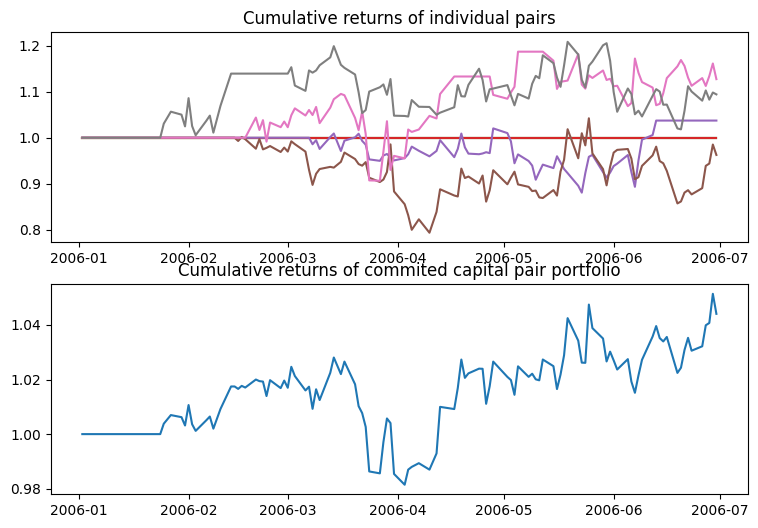

In [62]:
import warnings
warnings.filterwarnings("ignore")
#NTPC.NS	TATAPOWER.NS	
trades = calculate_pairs_returns(trade_ret.copy(), pairs.loc[3:7,], d_open = 2, wait1d = 1)
# returns of all pair trades 
pair_rets = trades["payoffs"]

fig = plt.figure();
fig.set_size_inches(9, 6);
ax1 = fig.add_subplot(2,1,1);
ax1.plot((1+pair_rets).cumprod());
ax1.set_title("Cumulative returns of individual pairs");
ax2 = fig.add_subplot(2,1,2);
ax2.plot((1+trades["returns_cc"]).cumprod());
ax2.set_title("Cumulative returns of commited capital pair portfolio");


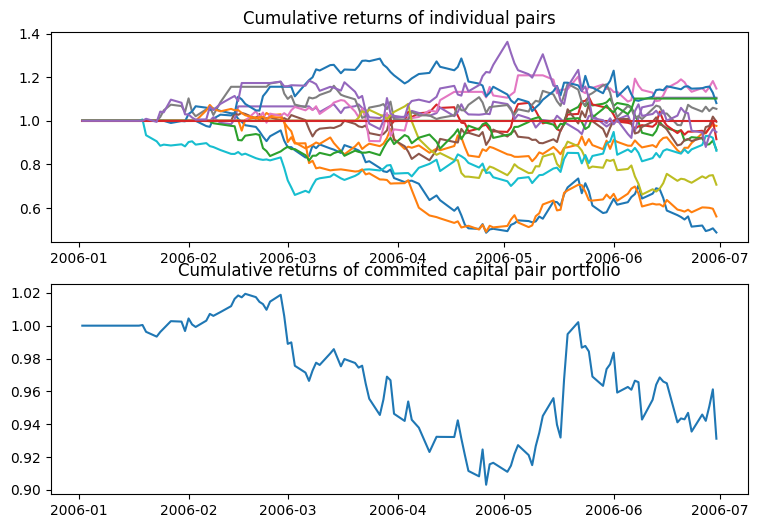

In [26]:
import warnings
warnings.filterwarnings("ignore")

trades = calculate_pairs_returns(trade_ret.copy(), pairs = pairs, d_open = 1.5, wait1d = 1)
# returns of all pair trades 
pair_rets = trades["payoffs"]

fig = plt.figure();
fig.set_size_inches(9, 6);
ax1 = fig.add_subplot(2,1,1);
ax1.plot((1+pair_rets).cumprod());
ax1.set_title("Cumulative returns of individual pairs");
ax2 = fig.add_subplot(2,1,2);
ax2.plot((1+trades["returns_cc"]).cumprod());
ax2.set_title("Cumulative returns of commited capital pair portfolio");

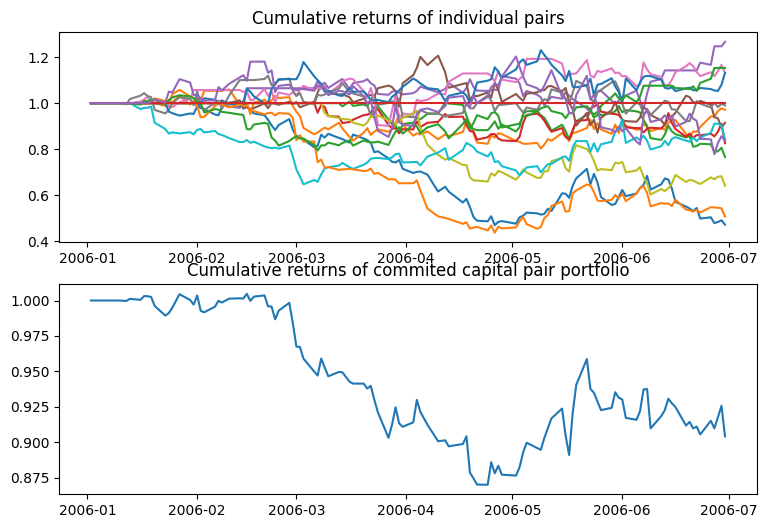

In [28]:
import warnings
warnings.filterwarnings("ignore")

trades = calculate_pairs_returns(trade_ret.copy(), pairs = pairs, d_open = 1, wait1d = 1)
# returns of all pair trades 
pair_rets = trades["payoffs"]

fig = plt.figure();
fig.set_size_inches(9, 6);
ax1 = fig.add_subplot(2,1,1);
ax1.plot((1+pair_rets).cumprod());
ax1.set_title("Cumulative returns of individual pairs");
ax2 = fig.add_subplot(2,1,2);
ax2.plot((1+trades["returns_cc"]).cumprod());
ax2.set_title("Cumulative returns of commited capital pair portfolio");

In [56]:
pairs1 = pairs.loc[2:4,]

In [57]:
pairs1

,leg_1,leg_2,dist,spread_std
2,BPCL.NS,ITC.NS,0.999326,0.321731
3,BPCL.NS,HINDUNILVR.NS,1.023245,0.276350
4,NTPC.NS,TATAPOWER.NS,1.056432,0.040994


In [38]:
pairs

leg_1              NTPC.NS
leg_2         TATAPOWER.NS
dist              1.056432
spread_std        0.040994
Name: 4, dtype: object